<a href="https://colab.research.google.com/github/alvinadar/RESNET/blob/main/Confustion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

print(os.listdir("drive/MyDrive/Extended"))

['gpu.csv', 'validation.csv', 'training.csv', 'training.gsheet', 'validation.gsheet', 'artificial_neural_network.py']


In [57]:
data = pd.read_csv("drive/MyDrive/Extended/validation.csv")

In [58]:
y=data.Result
x=data.drop('Result',axis=1)

Split the data to test and validation (80:20)

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [60]:
x_train.head()

,Filename,Young,Male,Eyeglasses,Bald
3096,005097.jpg,-1,1,-1,-1
2592,004593.jpg,1,1,-1,-1
585,002586.jpg,-1,-1,-1,-1
3269,005270.jpg,1,1,-1,-1
854,002855.jpg,1,-1,-1,-1


In [61]:
y_train

3096    True
2592    True
585     True
3269    True
854     True
        ... 
3003    True
674     True
3528    True
3896    True
2971    True
Name: Result, Length: 3200, dtype: bool

In [62]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3200 entries, 3096 to 2971
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Filename    3200 non-null   object
 1   Young       3200 non-null   int64 
 2   Male        3200 non-null   int64 
 3   Eyeglasses  3200 non-null   int64 
 4   Bald        3200 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 150.0+ KB


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Filename    4000 non-null   object
 1   Young       4000 non-null   int64 
 2   Male        4000 non-null   int64 
 3   Eyeglasses  4000 non-null   int64 
 4   Bald        4000 non-null   int64 
 5   Result      4000 non-null   bool  
dtypes: bool(1), int64(4), object(1)
memory usage: 160.3+ KB


In [64]:
print("The number of validation examples:",len(data))

The number of validation examples: 4000


Convert true and false to binary
Encode all the file names to numerical values for SKLearn compability 

In [66]:
y_train.astype(int)
y_test.astype(int)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_test['Filename'] = le.fit_transform(x_test['Filename'])
x_train['Filename'] = le.fit_transform(x_train['Filename'] )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Use a standard scalar to transform the x_train and x_test as an array of input for the sklearn function.

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [68]:
x_test

array([[-1.29741437, -1.88982237, -0.85478958, -0.27237101, -0.16012815],
       [-1.58645036, -1.88982237, -0.85478958, -0.27237101, -0.16012815],
       [-0.94883913,  0.52915026,  1.16987856, -0.27237101, -0.16012815],
       ...,
       [-1.65031974,  0.52915026,  1.16987856, -0.27237101, -0.16012815],
       [-1.2032341 ,  0.52915026, -0.85478958, -0.27237101, -0.16012815],
       [-1.24112272,  0.52915026, -0.85478958, -0.27237101, -0.16012815]])

In [75]:
rfc = RandomForestClassifier()

In [76]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
predictions = rfc.predict(x_test)


In [48]:
y_test = y_test.argmax(1)

Plot the confusion matrix 

In [86]:
conf_matrix = confusion_matrix(y_test,predictions)
print(conf_matrix)

[[ 34   0]
 [  0 766]]


Plot the confusion matrix heatmap 

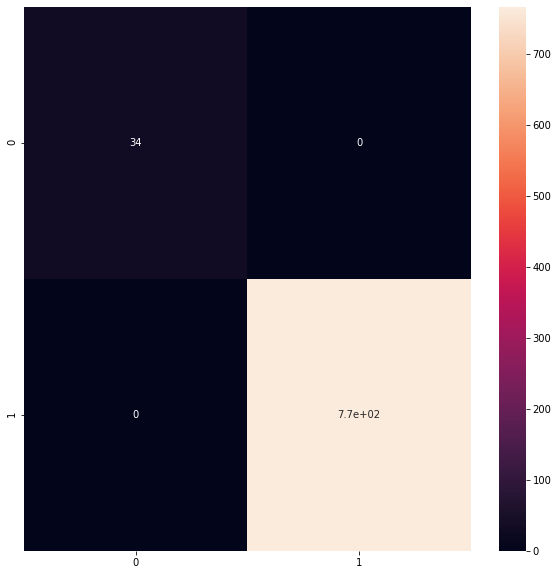

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt


plt.figure(figsize = (10, 10))
sns.heatmap(conf_matrix, annot = True)

Calculate the accuracy 

In [82]:
import numpy
import sklearn.metrics


r = sklearn.metrics.confusion_matrix(y_test, predictions)

r = numpy.flip(r)

acc = (r[0][0] + r[-1][-1]) / numpy.sum(r)
print(acc)

1.0


In [ ]:
Calculate the precision

In [84]:
from sklearn.metrics import confusion_matrix
import numpy as np


cm = confusion_matrix(y_test, predictions)
accuracy = sum(np.diag(conf_matrix))/np.sum(conf_matrix) #Takes the total sum of the true postive devides with all the true postives and true negatives.  
recall = np.diag(conf_matrix) / np.sum(cm, axis = 1)#Takes all the true postives devides with all the true postives and true negatives.
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis = 0)#Takes all the true postives devides with all the true postives and true negatives. 

print('The accuracy calculated from the confusion matrix: ',format(accuracy))
print('The recall calculated from the confusion matrix: ',format(recall))
print('The precision calculated from the confusion matrix: ',format(precision))

The accuracy calculated from the confusion matrix:  1.0
The recall calculated from the confusion matrix:  [1. 1.]
The precision calculated from the confusion matrix:  [1. 1.]
